## Machine Learning - Lab 10 - Support Vector Machines

* Full name: Đinh Anh Huy
* Student ID: 18110103

In [2]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
def display_data_and_boundary(x, y, pred_fn, ax=None):  
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    k = int(max(y)) + 1
    cols = ['ro', 'k^', 'b*','gx']
    for label in range(k):
      if ax is not None:
        ax.plot(x[(y==label),0], x[(y==label),1], cols[label%4], markersize=8)
      else:
        plt.plot(x[(y==label),0], x[(y==label),1], cols[label%4], markersize=8)
        
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    if ax is not None:
      ax.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
    else:
      plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
      plt.show()

### Bài tập 1.
**Thử chạy SVM trên 2 files data_3.txt và data_4.txt với $C=[0.1, 1.0, 10.0, 100.0]$.**

In [9]:
path_dt3 = "https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_3.txt"
path_dt4 = "https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_4.txt"

data_3 = np.loadtxt(path_dt3)
data_4 = np.loadtxt(path_dt4)

print(">> Shape of data 3: ", data_3.shape)
print(">> Shape of data 4: ", data_4.shape)

# Make training set X and label y
X_3 = data_3[:,:2]
y_3 = data_3[:,2]
X_4 = data_4[:,:2]
y_4 = data_4[:,2]

>> Shape of data 3:  (48, 3)
>> Shape of data 4:  (60, 3)


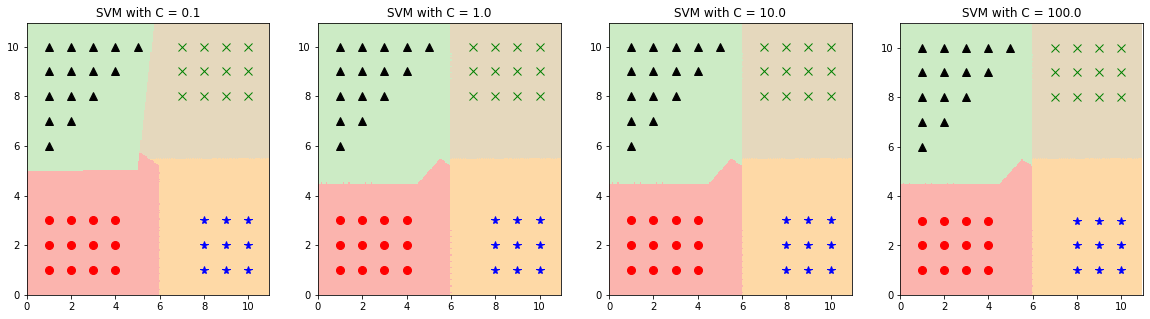

In [13]:
C = [0.1, 1.0, 10.0, 100.0]
fig, axs = plt.subplots(1, 4, figsize=(20,5))
for c, ax in zip(C, axs):
  svc = svm.SVC(C=c, kernel='linear', random_state=0).fit(X_3, y_3)
  pred_fn = lambda p: svc.predict(p.reshape(1,-1))
  display_data_and_boundary(X_3, y_3, pred_fn, ax)
  ax.set_title("SVM with C = %.1f" % c)
plt.show()

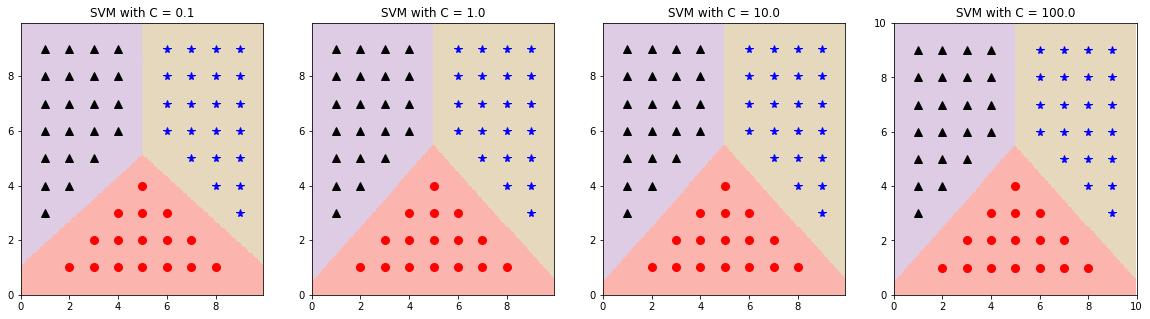

In [14]:
C = [0.1, 1.0, 10.0, 100.0]
fig, axs = plt.subplots(1, 4, figsize=(20,5))
for c, ax in zip(C, axs):
  svc = svm.SVC(C=c, kernel='linear', random_state=0).fit(X_4, y_4)
  pred_fn = lambda p: svc.predict(p.reshape(1,-1))
  display_data_and_boundary(X_4, y_4, pred_fn, ax)
  ax.set_title("SVM with C = %.1f" % c)
plt.show()

### Bài tập 2.
**Nhận xét với từng $C$ khác nhau thì mô hình thay đổi như thế nào.**

Ta có thể thấy rằng, ở cả 2 bộ dữ liệu data_3.txt và data_4.txt, kết quả của thuật toán SVM cho ra bộ boundary của các class với $C=0.1$ khác biệt khá nhiều so với kết quả thu được từ thuật toán với các giá trị $C=1$ hoặc $C=10$ hoặc $C=100$. Tuy nhiên, thuật toán vẫn xác định được các đường ranh tuyến tình classify các lớp rõ ràng với kernel là *linear*.

Do $C$ là một hyper-parameter cho biết khả năng kiểm soát các per-sample error của từng class, nếu $C$ càng lớn thì margin càng nhỏ (tức là các lớp phải được classify rạch ròi, không có điểm của lớp này nằm lẫn trong lớp khác) và nếu $C$ càng nhỏ thì margin càng lớn (tức là có thể có các điểm bị nằm lẫn vào trong các lớp khác). Do 2 bộ data này khá đặc biệt, ta có thể dễ dàng tìm ra các đường ranh tuyến tính mà classify tốt nhất, nên ta không thể thấy rõ được tác động của tham số $C$.

Ta xét data_4.txt và áp dụng thuật toán SVM với kernel là *poly* để thấy được sự tác động.

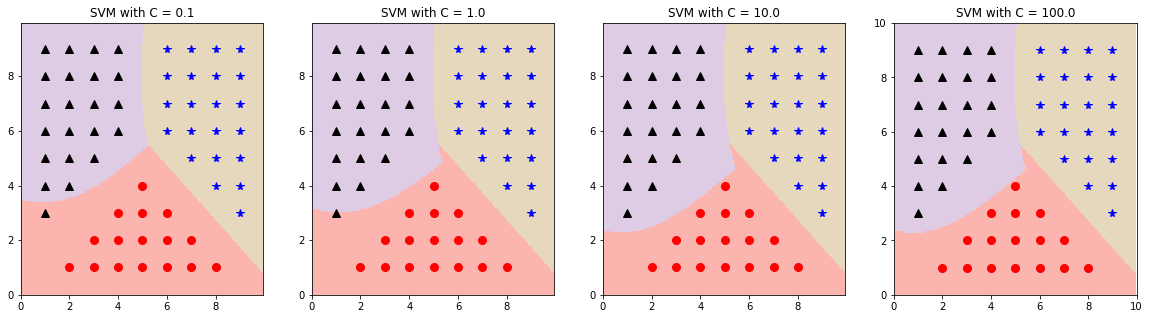

In [15]:
C = [0.1, 1.0, 10.0, 100.0]
fig, axs = plt.subplots(1, 4, figsize=(20,5))
for c, ax in zip(C, axs):
  svc = svm.SVC(C=c, kernel='poly', random_state=0).fit(X_4, y_4)
  pred_fn = lambda p: svc.predict(p.reshape(1,-1))
  display_data_and_boundary(X_4, y_4, pred_fn, ax)
  ax.set_title("SVM with C = %.1f" % c)
plt.show()

Ta có thể thấy rằng, với $C = 0.1$ và $C=1$, boundary của class màu đỏ chứa luôn sample đen, trong khi ta tăng giá trị của $C$ lên, thì boundary của các class được phân rõ ràng hơn.

### Bài tập 3.

**Nêu lợi và hại khi tăng $gamma$ và giảm $gamma$.**

$gamma$ là một hyper-parameter cho non-linear hyperplanes. $gamma$ parameter được xác định mức độ ảnh hưởng của một single training example. Nó có thể được xem là nghịch đảo của bán kính ảnh hưởng của các samples được model chọn làm support vectors.

Model SVM rất nhạy cảm với parameter này. 
  * Nếu tăng $gamma$ quá lớn, bán kính miền ảnh hưởng của support vectors chỉ chứa bản thân các suport vector, hay nói cách khác, boundary của một class fit vừa đúng với các sample thuộc đúng class đó. Điều này dẫn đến tình trạng overfitting, do tính quá fit với training dataset mà khi có sample mới đưa vào có thể bị classify sai. Do đó, ta cần giảm $gamma$ để tránh overfitting.
  * Nếu $gamma$ quá nhỏ, thì model bị hạn chế và không thể capture độ phức tạp hay "shape" của data. Khi đó kết quả đưa ra sẽ tương tự với linear SVM model. Điều đó sẽ gây ra tình trạng model không tốt đối với non-linear dataset. Khi đó, ta cần tăng $gamma$ để tránh model trở về dạng linear.

Từ 2 ý trên, ta cần chọn $gamma$ parameter thích hợp để model có thể cho ra kết quả tốt nhất. 

Ta xét ví dụ trên bộ IRIS dataset. Do bộ dữ liệu này có 4 chiều nên trước tiên ta cần dimension reduce về 2 chiều để tiện cho việc visualize.

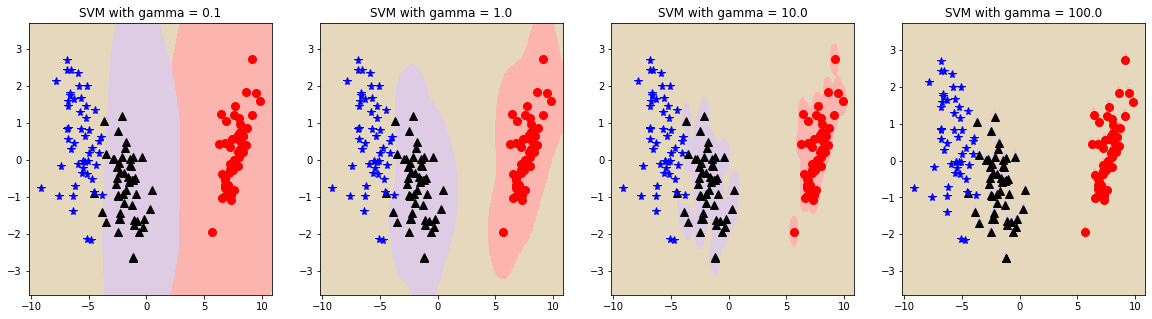

In [20]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Normalize data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Implement LDA with scikit-learn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2).fit(X_std, y)
X_trans = lda.transform(X_std)

gamma = [0.1, 1.0, 10.0, 100.0]
fig, axs = plt.subplots(1, 4, figsize=(20,5))
for g, ax in zip(gamma, axs):
  svc = svm.SVC(C=1, kernel='rbf', gamma=g, random_state=0).fit(X_trans, y)
  pred_fn = lambda p: svc.predict(p.reshape(1,-1))
  display_data_and_boundary(X_trans, y, pred_fn, ax)
  ax.set_title("SVM with gamma = %.1f" % g)
plt.show()

Ta thấy rằng, với giá trị của $gamma$ parameter càng cao, thì boundary tương ứng của từng class càng fit với từng sample trong class tương ứng. Ví dụ như với $gamma = 100$, boundary của class màu đỏ và đen lại đùng bằng vùng chứa chính các điểm có màu tương úng, còn lại là boundary của class màu xanh. Khi đó nếu có một sample mới được đưa vào model, thì khả năng cao sample đó sẽ được classify cho class màu xanh. Đây là trường hợp overfitting.